<a href="https://colab.research.google.com/github/KimNamHo2020/OpenCV-ss/blob/main/7CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **이미지 크기 축소**를 수행합니다


*   Interpolation(보간법):
Cubic 보간법은 더 복잡하지만 높은 품질을 제공합니다.
Bilinear 보간법은 Cubic보다 간단하고 속도가 빠르며, 적당한 품질을 제공합니다.
*   블러링:
크기 축소 전 블러링을 적용하면 노이즈와 왜곡을 줄이고 더 매끄러운 축소 이미지를 생성할 수 있습니다.




In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


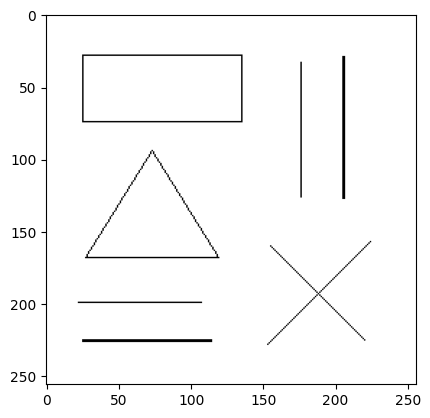

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/shrinking.bmp')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

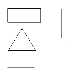

In [ ]:
outImg=cv2.resize(gImg, (0,0), fx=0.3, fy=0.3,interpolation=cv2.INTER_CUBIC)
cv2_imshow(outImg)

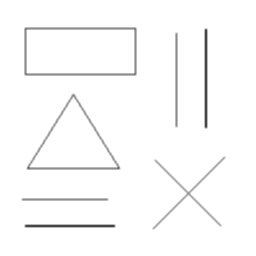

In [ ]:
blurImg =cv2.GaussianBlur(gImg, (3,3), 1)
outImg=cv2.resize(blurImg, (0,0), fx=0.5, fy=0.5,interpolation=cv2.INTER_LINEAR)
cv2_imshow(blurImg)

이미지의 회전과 이동 등의 변환을 수행하는 과정을 보여줍니다.



*   회전 변환: cv2.getRotationMatrix2D를 사용.
*   이동 변환: np.float32로 행렬 정의 후 cv2.warpAffine로 적용.
*  행렬 곱을 통해 여러 변환을 조합 가능.
*  이미지 중심 기준 회전은 중심 이동과 복귀 작업을 포함.





(256, 256)


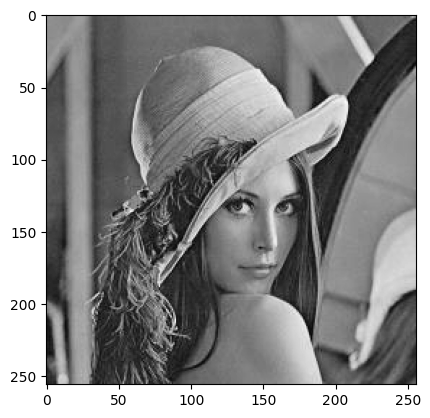

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [ ]:
height, width = gImg.shape[:2]

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]
(2, 3)


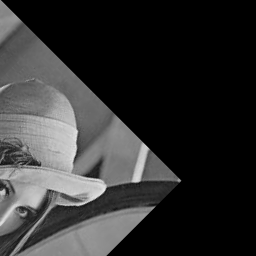

In [ ]:
M = cv2.getRotationMatrix2D((0,0),-45,1)
print(M)
print(M.shape)
outImg =cv2.warpAffine(gImg, M,(width,height))
cv2_imshow(outImg)

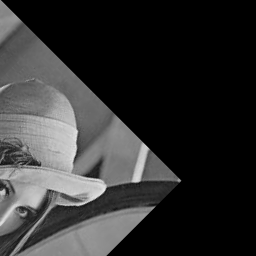

In [ ]:

M = cv2.getRotationMatrix2D((0,0),-45,1)
outImg1 =cv2.warpAffine(gImg, M,(width,height))
cv2_imshow(outImg1)

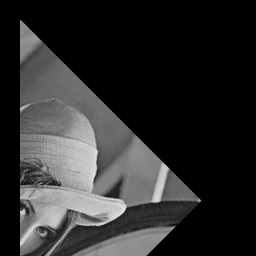

In [ ]:
M = np.float32([[1,0,20],[0,1,20]])
outImg2 = cv2.warpAffine(outImg1, M, (width,height))
cv2_imshow(outImg2)

In [ ]:

M1 = cv2.getRotationMatrix2D((0,0), -45, 1)
M2 = np.float32([[M1[0,0],M1[0,1],M1[0,2]],[M1[1,0],M1[1,1],M1[1,2]],[0,0,1]])
M3 = np.float32([[1,0,20],[0,1,20],[0,0,1]])
M4 = np.dot(M3,M2)

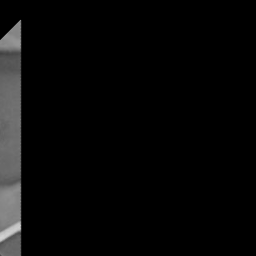

In [ ]:
M5 = np.float32([[M4[0,0],M4[0,1],M4[0,2]],[M4[1,0],M4[1,1],M4[1,2]]])
outImg3 = cv2.warpAffine(outImg1, M5, (width,height))
cv2_imshow(outImg3)

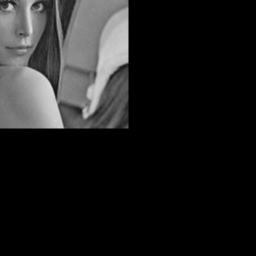

In [ ]:
M = np.float32([[1,0,-(width-1)/2.0],[0,1,-(height-1)/2.0]])
out1 = cv2.warpAffine(gImg, M, (width, height))
cv2_imshow(out1)


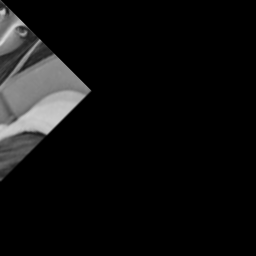

In [ ]:
M = cv2.getRotationMatrix2D((0,0), -45, 1)
out2 = cv2.warpAffine(out1, M, (width, height))
cv2_imshow(out2)

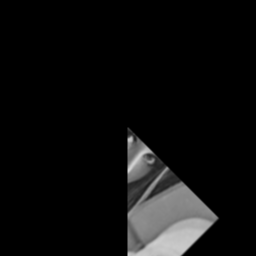

In [ ]:
M = np.float32([[1,0,(width-1)/2.0],[0,1,(height-1)/2.0]])
out3 = cv2.warpAffine(out2, M, (width, height))
cv2_imshow(out3)

In [ ]:
M1 = cv2.getRotationMatrix2D((0,0), -45, 1)
M2 = np.float32([[M1[0,0],M1[0,1],M1[0,2]],[M1[1,0],M1[1,1],M1[1,2]],[0,0,1]])
M3 = np.float32([[1,0,-(width-1)/2.0],[0,1,-(height-1)/2.0],[0,0,1]])
M4 = np.float32([[1,0,(width-1)/2.0],[0,1,(height-1)/2.0],[0,0,1]])
M5 = np.dot(M2,M3)
M5 = np.dot(M4,M5)


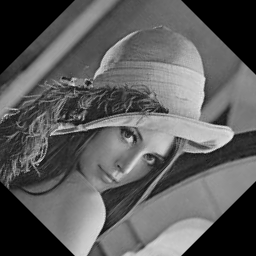

In [ ]:
M6 = np.float32([[M5[0,0],M5[0,1],M5[0,2]],[M5[1,0],M5[1,1],M5[1,2]]])
outImg4 = cv2.warpAffine(gImg, M6, (width,height))
cv2_imshow(outImg4)
